# Milestone 8 - Exploratory Analysis

The following notebook conducts exploratory analysis and all visualizations contained within the data story. 

In [610]:
import pandas as pd
import sqlite3
import re
import numpy as np
import seaborn as sns
from matplotlib.pyplot import suptitle
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [611]:
#create a connection object
conn = sqlite3.connect("../csv_processing/capstone.db")
#create a cursor object - allow us to execute SQL queries against a database
cur = conn.cursor()

In [612]:
#gather the articles from the article table in the database
df = pd.read_sql_query("select * from opioid_labels;", conn)
df.head()

class  compound     date_scraped  \
0  D     0.1018    45:07.5           
1  A     0.9951    36:36.7           
2  A     0.9605    01:04.5           
3  A     0.9965    01:04.5           
4  B     0.6024    3/26/2019 21:33   

                                                                                                                             full_url  \
0  /health/health-news/nih-cancer-chief-serve-acting-fda-commissioner-n982416                                                           
1  /health/health-news/aspiring-doctors-seek-advanced-training-addiction-medicine-n986301                                               
2  https://www.npr.org/sections/health-shots/2019/03/21/704557684/fentanyl-linked-deaths-the-u-s-opioid-epidemics-third-wave-begins     
3  https://www.npr.org/sections/health-shots/2019/03/19/695690652/aspiring-doctors-seek-advanced-training-in-addiction-medicine         
4  https://www.npr.org/sections/health-shots/2019/03/26/706848006/purdue-pharma-agrees-to-270-million-opioid-settlement-with-oklahoma   

   index_num    neg    neu    pos publication_type  \
0  1.0        0.044  0.895  0.061  Outlet            
1  5.0        0.027  0.885  0.089  Outlet            
2  24.0       0.051  0.872  0.077  Outlet            
3  31.0       0.020  0.884  0.096  Outlet            
4  44.0       0.083  0.824  0.092  Outlet            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

# General Exploratory Analysis

In [613]:
#describe the sentiment analysis from vader NLTK
df[['compound', 'neg', 'neu', 'pos', 'text_length']].describe()

compound        neg        neu        pos   text_length
count  93.000000  93.000000  93.000000  93.000000  93.000000   
mean   0.110592   0.069688   0.849559   0.080688   4716.064516 
std    0.889723   0.035865   0.037396   0.029848   3306.682334 
min   -0.999200   0.005000   0.761000   0.000000   315.000000  
25%   -0.948000   0.046000   0.824000   0.060000   2518.000000 
50%    0.602400   0.065000   0.850000   0.077000   4252.000000 
75%    0.982400   0.094000   0.880000   0.101000   6225.000000 
max    0.999600   0.230000   0.936000   0.204000   19307.000000

In [614]:
#describe the polarity and subjectivity of the articles frmo TextBlob 
df[['text_length', 'polarity', 'subjectivity']].describe()

text_length    polarity  subjectivity
count  93.000000     100.000000  100.000000  
mean   4716.064516   0.063600    0.419775    
std    3306.682334   0.059654    0.077675    
min    315.000000   -0.131250    0.000000    
25%    2518.000000   0.023055    0.376757    
50%    4252.000000   0.065744    0.421145    
75%    6225.000000   0.094332    0.465254    
max    19307.000000  0.220833    0.634649

In [615]:
#which article had a length of 315?
#appears to be garbage 
df[df['text_length'] ==315]['text']

47    CLICK HERE TO GET THE FOX NEWS APP,Consumers are advised to throw away affected products, or return it to the store for a refund. The notice did not specify if there had been any adverse reactions related to the recall, but directed customers with further questions to call the consumer care team at 1-888-280-0301.
Name: text, dtype: object

In [616]:
#what were the 5 shortest text lengths
df.nsmallest(5, 'text_length')

class  compound     date_scraped  \
47  None  0.5023    4/5/2019 23:20    
44  None -0.9715    4/4/2019 6:06     
49  A     0.6075    4/11/2019 23:23   
58  A     0.8126    4/12/2019 6:52    
61  D     0.8659    4/16/2019 7:45    

                                                                                                                   full_url  \
47  https://www.foxnews.com/health/e-coli-outbreak-in-kentucky-sickens-nearly-50-people-health-officials-say                  
44  https://www.foxnews.com/health/massachusetts-state-prisons-offer-medication-to-combat-inmates-opioid-addiction            
49  https://www.foxnews.com/health/uk-woman-botched-breast-implants-procedure-abroad                                          
58  https://www.chron.com/life/health//news/medical/article/Herbal-supplement-kratom-is-tied-to-more-US-deaths-13759867.php   
61  https://www.cnn.com/2019/04/15/health/nj-assisted-suicide-terminally-ill-law-trnd/index.html                              

    index_num    neg    neu    pos publication_type  \
47  706.0      0.053  0.872  0.075  Outlet            
44  693.0      0.230  0.770  0.000  Outlet            
49  736.0      0.094  0.792  0.113  Outlet            
58  805.0      0.049  0.827  0.123  Newspaper         
61  851.0      0.013  0.936  0.051  Outlet            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         text  \
47  CLICK HERE TO GET THE FOX NEWS APP,Consumers are advised to throw away affected products, or return it to the store for a refund. The notice did not specify if there had been any adverse reactions related to the recall, but directed customers with further questions to call the consumer care team at 1-888-280-0301.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
44  MARYLAND WOMAN SUFFERS STROKE AFTER TEARING ARTERY DURING YOGA POSE,&aposINSIDE EDITION&apos ANCHOR TO UNDERGO CANCER SURGERY AFTER VIEWER SPOTTED LUMP ON NECK,Such swelling is particularly problematic when it happens in brain cells. In severe cases, rapid brain swell

In [617]:
#filter where text length is greater than 80 to get rid of garbage 
df = df[df['text_length'] > 800]

In [618]:
df[['text_length', 'polarity', 'subjectivity']].describe()

text_length   polarity  subjectivity
count  90.000000     90.000000  90.000000   
mean   4856.311111   0.070655   0.423559    
std    3268.850073   0.056327   0.063273    
min    841.000000   -0.069737   0.269697    
25%    2700.500000   0.040918   0.378303    
50%    4402.000000   0.073485   0.422407    
75%    6303.000000   0.097192   0.466525    
max    19307.000000  0.220833   0.634649

In [619]:
#which article was the most polarizing?
df[df['polarity'] > 0.22]

class  compound    date_scraped  \
77  C     0.9922    4/25/2019 7:13   

                                                                                                             full_url  \
77  https://www.chron.com/life/health//news/medical/article/The-Latest-Trump-says-he-won-t-stop-fighting-13792173.php   

    index_num   neg    neu    pos publication_type  \
77  1184.0     0.05  0.825  0.125  Newspaper         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  \
77  ATLANTA (AP)  The Latest on the opioid epidemic (all times local):,2:15 p.m.,President Donald Trump says his administration is using every resource it has to fight the nation's opioid crisis. He says "nothing is going to stop" him from wiping it out.,He says his administration has secured $6 billion in federal dollars over two years to fight opioid abuse, but the epidemic won't be solved overnight.,Trump and first lady Melania Trump are speaking at a conference in Atlanta for elected leaders and health and law enforcement officials.,Opioid abuse claimed nearly 48,000 American lives in 2017. The number of prescriptions for opioid painkillers filled in the U.S. fell substantially in 2017, but it's unclear if the opioid problem is declining,___,11:25 a.m.,President Donald Trump is claiming credit for progress in battling the opioid epidemic. But there's a debate over whether the crisis has peaked and what his administration has accomplished.,The president and first lady Melania Trump are both speaking at a conference in Atlanta for elected leaders and health and law enforcement officials.,The president has declared opioids a national health emergency. The first lady focuses on the issue in her national "Be Best" child welfare campaign.,Opioid abuse claimed a record of nearly 48,000 American lives in 2017. An estimated 2 million people are addicted to the drugs, which include both legal prescription   

    text_length  \
77  1419.0        

                                                                              title  \
77  The Latest: Trump says he won't stop fighting opioid crisis - Houston Chronicle   

    title_length  url_id        website_name  polarity  subjectivity  \
77  79.0          11.0    Houston Chronicle   0.220833  0.391667       

      article_timestamp  
77  2019-04-24 13:39:00

In [534]:
#which article was the most subjective?
df[df['subjectivity'] > 0.6]

class  compound    date_scraped  \
85  A     0.9896    5/3/2019 14:48   

                                                                                                                full_url  \
85  https://www.chron.com/life/health//news/medical/article/The-Latest-Drug-company-founder-disappointed-in-13814488.php   

    index_num   neg    neu   pos publication_type  \
85  9313.0     0.04  0.841  0.12  Newspaper         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text  \
85  BOSTON (AP) — The Latest on the conviction of a drug company and four executives in a scheme to bribe doctors across the U.S. to prescribe a powerful opioid (all times local):,3:30 p.m.,A lawyer for a drug company founder convicted of bribing doctors to prescribe a powerful opioid is vowing to keep fighting the case.,Beth Wilkinson says in an emailed statement that she and Insys Therapeutics Founder John Kapoor are disappointed in Thursday's verdict, but will "continue the fight to clear Dr. Kapoor's name.",Kapoor and four other former executives of the Chandler, Arizona-based company were found guilty of racketeering conspiracy.,Wilkinson said the lengthy jury deliberations "confirm that this was far from an open-and-shut case.",All five of them have denied wrongdoing.,___,2:48 p.m.,The wealthy founder of a drug company has been convicted of scheming to bribe doctors across the country to prescribe a highly addictive fentanyl spray.,A jury found Insys Therapeutics Founder and former CEO John Kapoor guilty of racketeering conspiracy on Thursday after 15 days of deliberations.,Four other former employees of the Chandler, Arizona-based company were also convicted.,Prosecutors said Kapoor and the others conspired to bribe doctors to boost sales for the opioid meant for cancer patients with severe pain.,An attorney for Kapoor sought to shift blame onto the company's former vice president of sales, who pleaded guilty in November.,The others charged in the case have also denied wrongdoing.,Two other high-level executives, who pleaded guilty in the case, testified against Kapoor.   

    text_length  \
85  1599.0        

                                                                              title  \
85  The Latest: Drug company founder disappointed in conviction - Houston Chronicle   

    title_length  url_id        website_name  polarity  subjectivity  \
85  79.0          11.0    Houston Chronicle  -0.069737  0.634649     

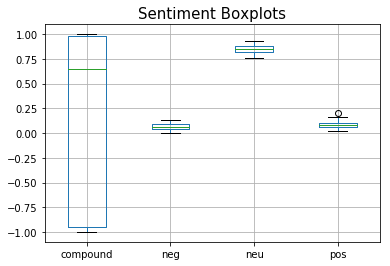

In [535]:
Sent_Box = df.boxplot(column=['compound', 'neg', 'neu', 'pos'])
Sent_Box.set_title("Sentiment Boxplots", fontsize = 15)
Sent_Box

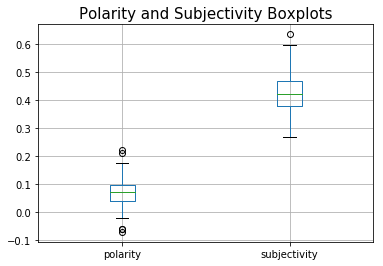

In [536]:
Pol_Box = df.boxplot(column=['polarity', 'subjectivity'])
Pol_Box.set_title("Polarity and Subjectivity Boxplots", fontsize = 15)
Pol_Box

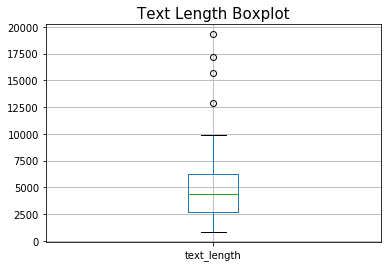

In [537]:
Text_Box = df.boxplot(column=['text_length'])
Text_Box.set_title("Text Length Boxplot",fontsize = 15)
Text_Box

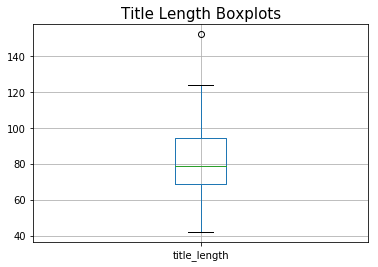

In [538]:
Text_Box = df.boxplot(column=['title_length'])
Text_Box.set_title("Title Length Boxplots",fontsize = 15)
Text_Box

In [539]:
#how does polarity and subjectivity vary by website? 
outlet = list(df['website_name'])
outlet = set(outlet)
for o in outlet: 
    #filter dfArticle for the outlet name 
    dfOutlet = df[df['website_name'] == o]
    print(o, " Polarity and Sentiment Statistics")
    print(dfOutlet[['polarity', 'subjectivity']].describe())




Houston Chronicle   Polarity and Sentiment Statistics
        polarity  subjectivity
count  18.000000  18.000000   
mean   0.063912   0.422440    
std    0.071471   0.074950    
min   -0.069737   0.316030    
25%    0.040666   0.372649    
50%    0.073292   0.413992    
75%    0.085601   0.461755    
max    0.220833   0.634649    
NBC News  Polarity and Sentiment Statistics
       polarity  subjectivity
count  3.000000  3.000000    
mean   0.100454  0.406515    
std    0.051030  0.059253    
min    0.049837  0.344973    
25%    0.074738  0.378183    
50%    0.099639  0.411394    
75%    0.125763  0.437286    
max    0.151887  0.463177    
LA Times  Polarity and Sentiment Statistics
       polarity  subjectivity
count  1.000000  1.000000    
mean   0.075596  0.542205    
std   NaN       NaN          
min    0.075596  0.542205    
25%    0.075596  0.542205    
50%    0.075596  0.542205    
75%    0.075596  0.542205    
max    0.075596  0.542205    
CBS News  Polarity and Sentiment Statis

In [540]:
#how does the average polarity and subjectivity vary by publication? 
dfStat = df[['website_name', 'polarity', 'subjectivity']]
dfStat.groupby(dfStat.website_name).mean().sort_values('polarity', ascending=False)

polarity  subjectivity
website_name                              
CBS News            0.132447  0.459179    
NPR                 0.112717  0.407239    
NBC News            0.100454  0.406515    
New York Times      0.081683  0.444673    
LA Times            0.075596  0.542205    
Fox News            0.070223  0.416225    
Chicago Tribune     0.064384  0.396233    
Houston Chronicle   0.063912  0.422440    
Denver Post         0.054938  0.393232    
CNN                 0.052576  0.424566

In [541]:
#is polarity and subjectivity related? 
dfStat.corr()

polarity  subjectivity
polarity      1.000000  0.067808    
subjectivity  0.067808  1.000000

Text(0,0.5,'Website Name')

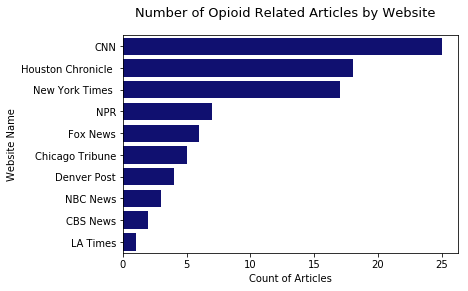

In [542]:
p = sns.countplot(data=df, y = 'website_name', order = df['website_name'].value_counts().index, color = 'navy')
suptitle("Number of Opioid Related Articles by Website",fontsize = 13)
p.set_xlabel("Count of Articles")
p.set_ylabel("Website Name")

In [543]:
df.dtypes

class                object 
compound             float64
date_scraped         object 
full_url             object 
index_num            float64
neg                  float64
neu                  float64
pos                  float64
publication_type     object 
text                 object 
text_length          float64
title                object 
title_length         float64
url_id               float64
website_name         object 
polarity             float64
subjectivity         float64
article_timestamp    object 
dtype: object

In [544]:
#convert the article timestamp to datetime 
df['article_timestamp'] = pd.to_datetime(df['article_timestamp'])

In [545]:
df['article_timestamp'] = df['article_timestamp'].dt.strftime('%m/%Y')

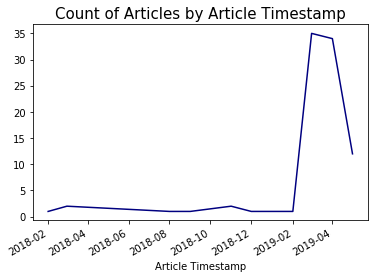

In [546]:
df['article_timestamp'] = pd.to_datetime(df['article_timestamp'])
t = df['article_timestamp'].value_counts().plot(color = 'navy')
t.set_title("Count of Articles by Article Timestamp",fontsize = 15)
t.set_xlabel("Article Timestamp")
t

In [547]:
#what are the older articles? 
dfOld = df[df["article_timestamp"] <= '01/2019']
print("Total number of articles published before January 2019 ", len(dfOld))
dfOld['website_name'].value_counts()

Total number of articles published before January 2019  8


CNN    8
Name: website_name, dtype: int64

In [548]:
#which classes are from the older articles? 
dfOld['class'].value_counts()

D    3
A    3
C    1
B    1
Name: class, dtype: int64

In [549]:
#what are the titles?
for t in dfOld['title']:
    print(t)

While America wages war on opioids, meth makes its comeback - CNN
Escape from the Mayo Clinic: Teen accuses world-famous hospital of 'medical kidnapping' - CNN
For doctors, more opioid prescriptions bring more money - CNN
Inside the secret lives of  functioning heroin addicts - CNN
She drank kratom tea while pregnant. Then her newborn went into withdrawal - CNN
Eat healthier without quitting sugar - CNN
Love and heroin don't mix. How these newlyweds survived a harrowing romance - CNN
The impact homelessness and the opioid crisis are having on San Francisco streets - CNN


Text(0.5,0,'Article Timestamp')

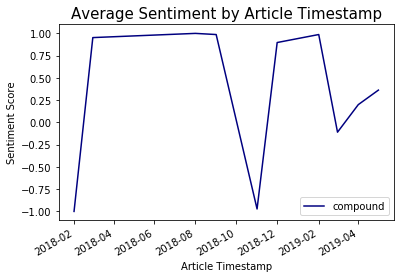

In [550]:
#How does the sentiment change over time? 
dfTimeSent = df[['article_timestamp', 'compound']]
TimeSent = dfTimeSent.groupby(dfTimeSent.article_timestamp).mean()
s = TimeSent.plot(color = "navy")
s.set_title("Average Sentiment by Article Timestamp",fontsize = 15)
s.set_ylabel("Sentiment Score")
s.set_xlabel("Article Timestamp")

In [551]:
#which articles have positive sentiment? 
dfPos = df[df['compound'] >= .5]
print("Total number of articles with a sentiment score of .5 or higher ", len(dfPos))
dfPos['website_name'].value_counts()

Total number of articles with a sentiment score of .5 or higher  47


CNN                   15
New York Times        10
Houston Chronicle     8 
NPR                   6 
Fox News              3 
Denver Post           1 
CBS News              1 
LA Times              1 
NBC News              1 
Chicago Tribune       1 
Name: website_name, dtype: int64

In [552]:
#which classes are from the older articles? 
dfPos['class'].value_counts()

D    15
B    14
A    12
C    6 
Name: class, dtype: int64

In [380]:
#what are the titles that are positive sentiment? 
for t in dfPos['title']:
    print(t)

Aspiring doctors seek advanced training in addiction medicine
Steep Rise In Fentanyl-Linked Deaths Marks Opioid Epidemic's Third Wave : Shots - Health News : NPR
Addiction Medicine Lures A New Generation Of Idealistic Doctors : Shots - Health News : NPR
Purdue Pharma Settles Opioid Lawsuit In Oklahoma : Shots - Health News : NPR
Study: Hepatitis C Infected Organs OK For Heart And Lung Transplants : Shots - Health News : NPR
The Risks to Babies of Older Fathers - The New York Times
Purdue Pharma and Sacklers Reach $270 Million Settlement in Opioid Lawsuit - The New York Times
Trump Officials Broaden Attack on Health Law, Arguing Courts Should Reject All of It - The New York Times
The Measles Emergency: What Are Religious Exemptions? - The New York Times
Medical marijuana helped elderly with chronic pain and reduced their use of opioids, study found - Chicago Tribune
London's National Portrait Gallery and Sackler family jointly agree to not proceed with donations - CNN
Escape from the Ma

In [553]:
sid = SentimentIntensityAnalyzer()

In [554]:
#initialize an empty list to store in the sentiment results
word_sent = []
words = []

i = 1
#of the positive articles, which words were contributing the most to the positive sentiment? 
for article in dfPos['text'][0:5]:
    #get rid of punctuation 
    article = re.sub(r"[,.;@#?!&$]+\ *", " ", article)
    #split the article into words
    word_list = article.split(" ")
    #grab the unique words
    word_list = set(word_list)
    #calculate the sentiment for each word and store the top 10 words 
    for word in word_list: 
        words.append(word)
        word_sent.append(sid.polarity_scores(word))
    #create a dataframe of words and the sentiment results 
    dfSent = pd.DataFrame(word_sent)
    dfSent['word'] = words
    print(dfPos['title'][i])
    print(dfSent.nlargest(10, 'compound'))
    i += 1

Aspiring doctors seek advanced training in addiction medicine
     compound  neg  neu  pos         word
264  0.6369    0.0  0.0  1.0  love       
261  0.5267    0.0  0.0  1.0  justice    
198  0.5106    0.0  0.0  1.0  talented   
394  0.5106    0.0  0.0  1.0  comfortable
65   0.4939    0.0  0.0  1.0  exciting   
163  0.4939    0.0  0.0  1.0  care       
316  0.4767    0.0  0.0  1.0  approval   
297  0.4588    0.0  0.0  1.0  honestly   
362  0.4404    0.0  0.0  1.0  hope       
423  0.4404    0.0  0.0  1.0  good       
Steep Rise In Fentanyl-Linked Deaths Marks Opioid Epidemic's Third Wave : Shots - Health News : NPR
     compound  neg  neu  pos           word
264  0.6369    0.0  0.0  1.0  love         
464  0.5574    0.0  0.0  1.0  sophisticated
261  0.5267    0.0  0.0  1.0  justice      
592  0.5267    0.0  0.0  1.0  kind         
198  0.5106    0.0  0.0  1.0  talented     
394  0.5106    0.0  0.0  1.0  comfortable  
485  0.5106    0.0  0.0  1.0  encourage    
65   0.4939    0.0  0.0 

In [555]:
#initialize an empty list to store in the sentiment results
word_sent = []
words = []

i = 1
#of the positive articles, which words were contributing the most to the positive sentiment? 
for article in dfPos['text'][0:5]:
    #split the article into words
    word_list = article.split(".")
    word_list = article.split("?")
    word_list = article.split("!")
    #grab the unique words
    #word_list = set(word_list)
    #calculate the sentiment for each word and store the top 10 words 
    for word in word_list: 
        words.append(word)
        word_sent.append(sid.polarity_scores(word))
    #create a dataframe of words and the sentiment results 
    dfSent = pd.DataFrame(word_sent)
    dfSent['word'] = words
    print(dfPos['title'][i])
    print(dfSent.nlargest(3, 'compound'))
    i += 1

Aspiring doctors seek advanced training in addiction medicine
   compound    neg    neu    pos  \
0  0.9951    0.027  0.885  0.089   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

The results from NLTK Vader Sentiment Analyzer is providing positive sentiment for articles that are not truly positive. It is weighing works like "love" and "sophisticated" heavily providing false positives for sentiment. The polarity and objectivity using TextBlob will be used to further conduct analysis.

Text(0.5,0,'Article Timestamp')

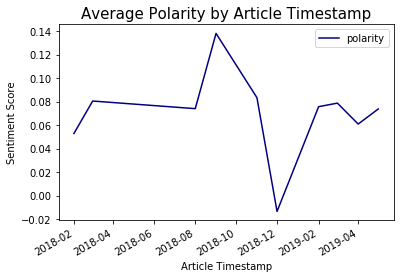

In [575]:
#How does the sentiment change over time? 
dfTimeSent = df[['article_timestamp', 'polarity']]
TimeSent = dfTimeSent.groupby(dfTimeSent.article_timestamp).mean()
s = TimeSent.plot(color = "navy")
s.set_title("Average Polarity by Article Timestamp",fontsize = 15)
s.set_ylabel("Sentiment Score")
s.set_xlabel("Article Timestamp")

In [557]:
#which articles were posted in 12/2018
df[df['article_timestamp'] == '2018-12-01']

class  compound date_scraped  \
31  C     0.8969    32:28.9       

                                                                           full_url  \
31  https://www.cnn.com/2018/12/27/health/drug-use-san-francisco-streets/index.html   

    index_num   neg   neu   pos publication_type  \
31  435.0      0.07  0.85  0.08  Outlet            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [558]:
#which articles were posted in 09/2018
df[df['article_timestamp'] == '2018-09-01']

class  compound date_scraped  \
30  A     0.9866    32:22.4       

                                                                       full_url  \
30  https://www.cnn.com/2018/09/13/health/opioid-recovery-love-story/index.html   

    index_num    neg    neu    pos publication_type  \
30  430.0      0.092  0.794  0.114  Outlet            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Organization Entity Tagging

The following section uses the spacy library to gather the Organization tags for analysis

In [578]:
import spacy

In [579]:
#import the english model 
import en_core_web_sm
nlp = en_core_web_sm.load()

In [580]:
#initialize a list to store org names 
org_list = []

#for each article text
for text in df['text']:
    #run the text through the model 
    doc = nlp(text)
    #for each entity in the article 
    for ent in doc.ents:
        #if the entity is an org, add to list 
        if ent.label_ == 'ORG' and ent.text:
            org_list.append(ent.text)


In [581]:
#create a dataframe of organization names 
dfOrg = pd.DataFrame(org_list, columns = ['Organization'])
dfOrg.head()

Organization
0  the National Cancer Institute      
1  the Food and Drug Administration   
2  the National Institutes of Health's
3  Human Services                     
4  FDA

In [588]:
#what are the top5 orgs? 
dfOrg['Organization'].value_counts().head(5)


FDA              64
Purdue           57
Purdue Pharma    49
OxyContin        49
Sacklers         36
Name: Organization, dtype: int64

In [600]:
#you can see the entity tagging used Purdue twice, clean this up 
dfOrg[dfOrg['Organization'].str.contains("Purdue")] ="Purdue Pharma"
dfOrg['Organization'].value_counts().head()

Purdue Pharma    116
FDA              64 
OxyContin        49 
Sacklers         36 
CNN              28 
Name: Organization, dtype: int64

Text(0,0.5,'Count of Mentions')

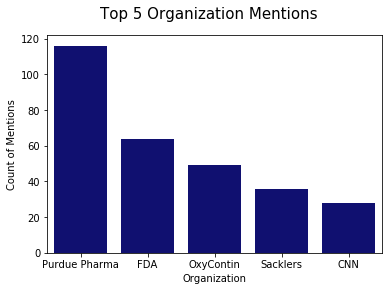

In [601]:
#show value counts in bar chart
e = sns.countplot(data=dfOrg, x = 'Organization', order = dfOrg['Organization'].value_counts().head().index, color = 'navy')
suptitle("Top 5 Organization Mentions",fontsize = 15)
e.set_xlabel("Organization")
e.set_ylabel("Count of Mentions")

In [605]:
#which articles contained the FDA? 
df[df['text'].str.contains("FDA")]

class  compound     date_scraped  \
0   D     0.1018    45:07.5           
17  D    -0.9925    4/4/2019 8:33     
28  A    -0.9555    31:23.6           
32  B    -0.9509    3/26/2019 7:09    
36  D     0.9834    4/3/2019 7:06     
40  C    -0.3167    3/31/2019 16:32   
41  C     0.9683    4/7/2019 17:00    
42  D     0.9867    3/28/2019 7:33    
48  C     0.6940    4/11/2019 23:23   
53  D    -0.9887    4/3/2019 7:03     
56  C     0.9933    4/10/2019 7:04    
57  B     0.0000    4/11/2019 7:16    
60  A    -0.9007    4/15/2019 7:43    

                                                                                                                 full_url  \
0   /health/health-news/nih-cancer-chief-serve-acting-fda-commissioner-n982416                                              
17  https://www.cbsnews.com/news/cbd-oil-6-key-questions-answered-about-the-marijuana-extract/                              
28  https://www.cnn.com/2018/11/07/health/kratom-tea-neonatal-abstinence-syndrome-study/index.html                          
32  https://www.cnn.com/2019/03/24/health/sackler-lawsuit/index.html                                                        
36  https://www.cnn.com/2019/04/02/health/cbd-cannabidiol-regulation-bn/index.html                                          
40  https://www.denverpost.com/2019/03/31/fda-opioid-pain-pills-replacements/                                               
41  https://www.denverpost.com/2019/04/07/kratom-opioids-castle-rock-colorado/                                              
42  https://www.latimes.com/health/la-sci-fda-supplement-oversight-20190211-story.html                                      
48  https://www.foxnews.com/health/man-develops-odd-lesion-on-eyeball-2-years-after-cataract-surgery                        
53  https://www.chron.com/life/health//news/medical/article/US-regulators-plan-hearing-on-growing-use-of-CBD-13735077.php   
56  https://www.chron.com/life/health//news/medical/article/US-warns-docs-not-to-abruptly-halt-opioid-pain-13754303.php     
57  https://www.chron.com/life/health//news/medical/article/Anti-opioid-addiction-drug-maker-charged-with-13756262.php      
60  https://www.cnn.com/2019/04/12/health/kratom-deaths-cdc-study/index.html                                                

    index_num    neg    neu    pos publication_type  \
0   1.0        0.044  0.895  0.061  Outlet            
17  225.0      0.087  0.855  0.058  Outlet            
28  405.0      0.093  0.835  0.072  Outlet            
32  445.0      0.105  0.805  0.089  Outlet            
36  505.0      0.049  0.850  0.101  Outlet            
40  595.0      0.104  0.788  0.108  Newspaper         
41  610.0      0.059  0.857  0.084  Newspaper         
42  639.0      0.064  0.823  0.113  Newspaper         
48  731.0      0.067  0.833  0.100  Outlet            
53  762.0      0.084  0.853  0.063  Newspaper         
56  791.0      0.028  0.887  0.085  Newspaper         
57  795.0      0.038  0.924  0.038  Newspaper         
60  843.0      0.101  0.880  0.019  Outlet            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Location Analysis Long Format

The following section extracts the states mentioned within the opioid articles and formats the data to be long. 

In [561]:
#create a connection object
conn = sqlite3.connect("../csv_processing/capstone.db")
#create a cursor object - allow us to execute SQL queries against a database
cur = conn.cursor()
dfState = pd.read_sql_query("SELECT * from state;", conn)
dfState.head()

index       State     ESOOS
0  0      Alabama     Unfunded
1  1      Alaska      Funded  
2  2      Arizona     Unfunded
3  3      Arkansas    Unfunded
4  4      California  Funded

In [609]:
#grab the unique states 
states = set(dfState['State'])

In [387]:
#create a dictionary with the city name as the key and a list of the city split by space in the values 
k = []
v = []

for c in states: 
    k.append(c)
    v.append(c.split(' '))

# Create a zip object from two lists
zipbObj = zip(k, v)
 
# Create a dictionary from zip object
dictGeo = dict(zipbObj)

In [388]:
found_match = False
found_state = []
#For every article in the data frame 
for t in df['text']:
    #initialize a list that will hold the state names within each article 
    state_list = []
    #remove punctuation 
    clean = re.sub(r'[^\w\s]',' ',t)
    #for each word in the article 
    for word in clean.split(' '):
        if found_match:        
            stateTest = stateTest
        else:
            stateTest = ''
        found_match = False
        for state in dictGeo.keys():            
            if word in dictGeo[state]:
                stateTest += word + ' '
                found_match = True        
            if stateTest.split(' ')[0:-1] == state.split(' '):
                state_list.append(state) 
    #change the state list to a set to grab the unique states
    state_list = set(state_list)
    #change the set back into a list to split the object 
    state_list = list(state_list)
    #append states to a list
    found_state.append(state_list) #','.join(state_list)


In [389]:
df['state_mention'] = found_state

In [390]:
#what is the max number of states mentioned in an article? 
i = 0
for row in df['state_mention']:
    if len(row) > i:
        i = len(row)
print(i)

11


In [391]:
#create a list of column names for the new dataframe 
col = []
for x in range(i):
    col.append('st' + str(x))
col

['st0', 'st1', 'st2', 'st3', 'st4', 'st5', 'st6', 'st7', 'st8', 'st9', 'st10']

In [392]:
#create a dataframe of the state mentions
dfState = pd.DataFrame(df['state_mention'].values.tolist(), columns= col)

dfState.head()

st0            st1     st2   st3   st4   st5   st6   st7   st8  \
0  Connecticut     Washington    None  None  None  None  None  None  None   
1      Arizona       Illinois    None  None  None  None  None  None  None   
2       Hawaii  Massachusetts  Alaska  None  None  None  None  None  None   
3      Arizona       Illinois    None  None  None  None  None  None  None   
4         Ohio       Oklahoma    None  None  None  None  None  None  None   

    st9  st10  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None

In [393]:
#concatenate df to dfState column wise
dfWide = pd.concat([df, dfState], axis = 1)
dfWide.head()

article_timestamp class  compound     date_scraped  \
0        2019-03-01     D    0.1018          45:07.5   
1        2019-03-01     A    0.9951          36:36.7   
2        2019-03-01     A    0.9605          01:04.5   
3        2019-03-01     A    0.9965          01:04.5   
4        2019-03-01     B    0.6024  3/26/2019 21:33   

                                            full_url  index_num    neg    neu  \
0  /health/health-news/nih-cancer-chief-serve-act...        1.0  0.044  0.895   
1  /health/health-news/aspiring-doctors-seek-adva...        5.0  0.027  0.885   
2  https://www.npr.org/sections/health-shots/2019...       24.0  0.051  0.872   
3  https://www.npr.org/sections/health-shots/2019...       31.0  0.020  0.884   
4  https://www.npr.org/sections/health-shots/2019...       44.0  0.083  0.824   

     pos publication_type  ...             st1     st2   st3   st4   st5  \
0  0.061           Outlet  ...      Washington    None  None  None  None   
1  0.089           Outlet  ...        Illinois    None  None  None  None   
2  0.077           Outlet  ...   Massachusetts  Alaska  None  None  None   
3  0.096           Outlet  ...        Illinois    None  None  None  None   
4  0.092           Outlet  ...        Oklahoma    None  None  None  None   

    st6   st7   st8   st9  st10  
0  None  None  None  None  None  
1  None  None  None  None  None  
2  None  None  None  None  None  
3  None  None  None  None  None  
4  None  None  None  None  None  

[5 rows x 30 columns]

In [394]:
#drop date_scraped to avoid duplicate articles 
dfWide = dfWide.drop(['state_mention', 'date_scraped', 'article_timestamp', 'full_url'], axis=1)

In [395]:
 dfLong = pd.melt(dfWide, id_vars=['title', 'text', 'compound',
 'neg', 'neu', 'pos', 'title_length', 'text_length', 'url_id', 'website_name', 'publication_type', 'polarity', 'subjectivity'], value_vars = col, value_name = 'state')

In [396]:
dfLong = dfLong.drop(['variable'], axis = 1)

In [397]:
dfLong = dfLong.drop_duplicates()
dfLong = dfLong.dropna(subset=['state'])

In [398]:
dfLong['title'][0]

'NIH cancer chief to serve as acting FDA commissioner'

In [399]:
dfLong[dfLong['title'] == 'NIH cancer chief to serve as acting FDA commissioner']

title  \
0    NIH cancer chief to serve as acting FDA commis...   
102  NIH cancer chief to serve as acting FDA commis...   

                                                  text  compound    neg  \
0    The head of the National Cancer Institute will...    0.1018  0.044   
102  The head of the National Cancer Institute will...    0.1018  0.044   

       neu    pos  title_length  text_length  url_id website_name  \
0    0.895  0.061          52.0       2411.0     7.0     NBC News   
102  0.895  0.061          52.0       2411.0     7.0     NBC News   

    publication_type  polarity  subjectivity        state  
0             Outlet  0.049837      0.411394  Connecticut  
102           Outlet  0.049837      0.411394   Washington

In [564]:
#40 states were mentioned
len(set(dfLong['state']))

33

In [565]:
#what were the top 10 mentioned states?
dfLong['state'].value_counts().head(10)

Washington       11
Massachusetts    10
Oklahoma         10
California       6 
Ohio             6 
Connecticut      5 
Illinois         4 
Arizona          4 
Colorado         3 
Tennessee        3 
Name: state, dtype: int64

Text(0,0.5,'')

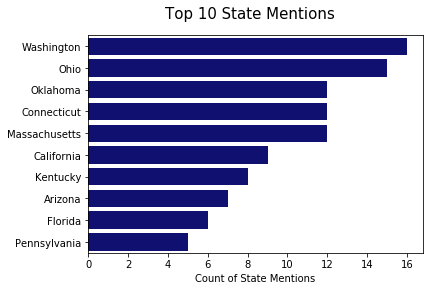

In [405]:
e = sns.countplot(data=dfLong, y = 'state', order = dfLong['state'].value_counts().head(10).index, color = 'navy')
suptitle("Top 10 State Mentions",fontsize = 15)
e.set_xlabel("Count of State Mentions")
e.set_ylabel("")

In [406]:
dfS = dfLong['state'].to_frame()
len(dfS)

166

In [566]:
#connect to the state ESOOS data 
dfE = pd.read_sql_query("select * from state;", conn)
dfE.head()

index       State     ESOOS
0  0      Alabama     Unfunded
1  1      Alaska      Funded  
2  2      Arizona     Unfunded
3  3      Arkansas    Unfunded
4  4      California  Funded

In [567]:
#how do the state metions vary by funded v. unfunded 
#join the dataframes by state
dfState = pd.merge(dfS, dfE, left_on='state', right_on = 'State', how='left')
#validate we kept all state mentions 
len(dfState)

166

In [568]:
dfState.head()

state  index        State     ESOOS
0  Connecticut  6.0    Connecticut  Funded  
1  Arizona      2.0    Arizona      Unfunded
2  Hawaii       11.0   Hawaii       Unfunded
3  Arizona      2.0    Arizona      Unfunded
4  Ohio         35.0   Ohio         Funded

Text(0,0.5,'Count of State Mentions')

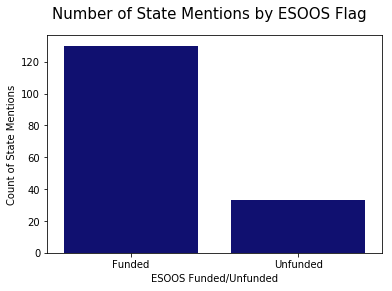

In [410]:
#Out of all the state metnions, which ones were funded? 
e = sns.countplot(data=dfState, x = 'ESOOS', order = dfState['ESOOS'].value_counts().index, color = 'navy')
suptitle("Number of State Mentions by ESOOS Flag",fontsize = 15)
e.set_xlabel("ESOOS Funded/Unfunded")
e.set_ylabel("Count of State Mentions")

Text(0,0.5,'')

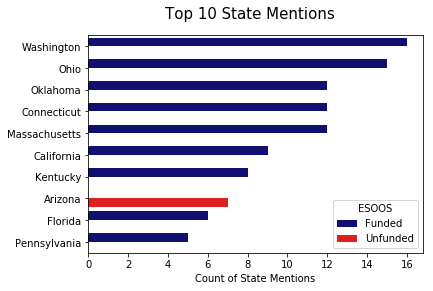

In [411]:
#out of the top 10 states, which ones were funded? 
e = sns.countplot(data=dfState, y = 'state', order = dfState['state'].value_counts().head(10).index, hue = dfState['ESOOS'], palette=["navy", "red"])
suptitle("Top 10 State Mentions",fontsize = 15)
e.set_xlabel("Count of State Mentions")
e.set_ylabel("")

In [412]:
#create a table with the state mentions 
dfLong.to_sql('opioid_state_long', conn,index=False, if_exists = 'replace')
conn.commit()

# Republishing Analysis

The following section analyzes the article_timestamp field.

In [569]:
#gather all publishings of the opioid related articles 
dfAll = pd.read_sql_query("select o.title, o.text, o.website_name from opioid_labels o inner join article a on o.full_url = a.full_url;", conn)
dfAll.head()

title  \
0  NIH cancer chief to serve as acting FDA commissioner            
1  Aspiring doctors seek advanced training in addiction medicine   
2  Aspiring doctors seek advanced training in addiction medicine   
3  Aspiring doctors seek advanced training in addiction medicine   
4  Aspiring doctors seek advanced training in addiction medicine   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [570]:
len(dfAll)

501

In [571]:
list(dfAll)

['title', 'text', 'website_name']

Text(0,0.5,' ')

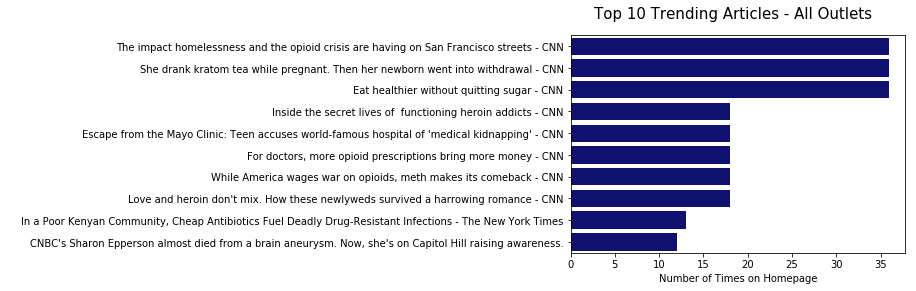

In [572]:
#which articles were republished the most? 
a = sns.countplot(data=dfAll, y = 'title', order = dfAll['title'].value_counts().head(10).index, color = 'navy')
suptitle("Top 10 Trending Articles - All Outlets",fontsize = 15)
a.set_xlabel("Number of Times on Homepage")
a.set_ylabel(" ")

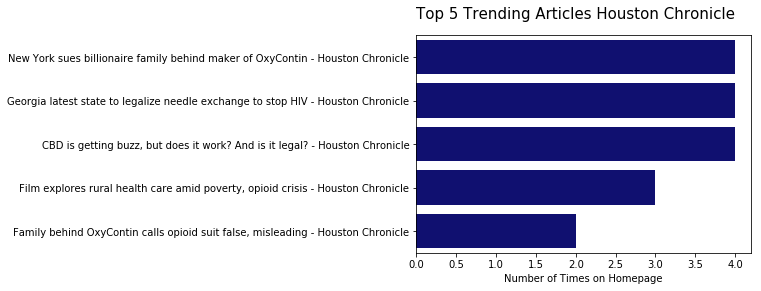

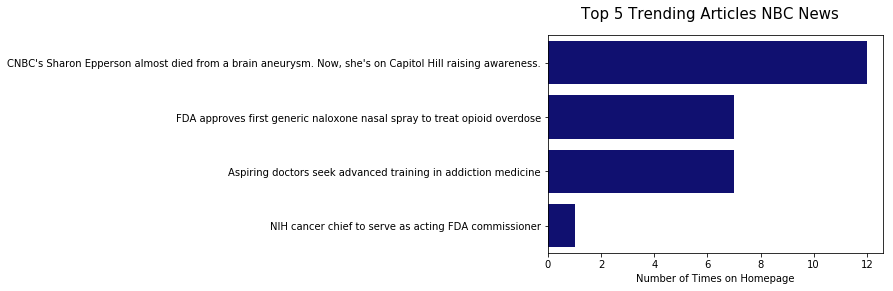

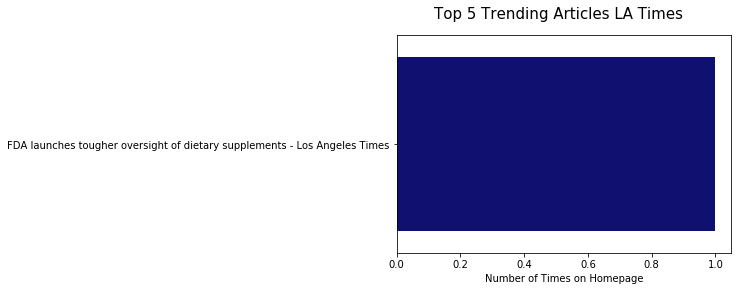

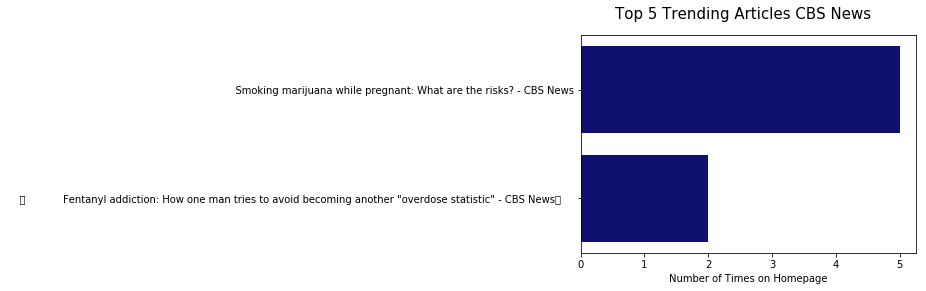

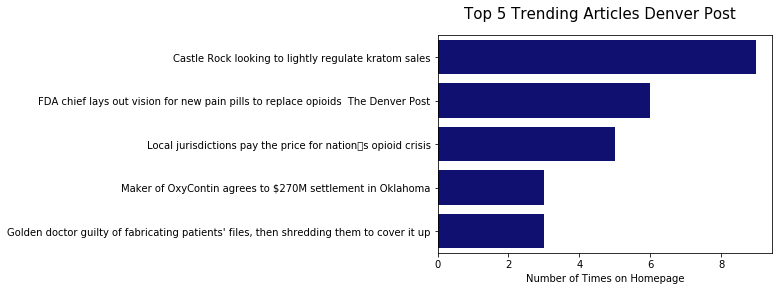

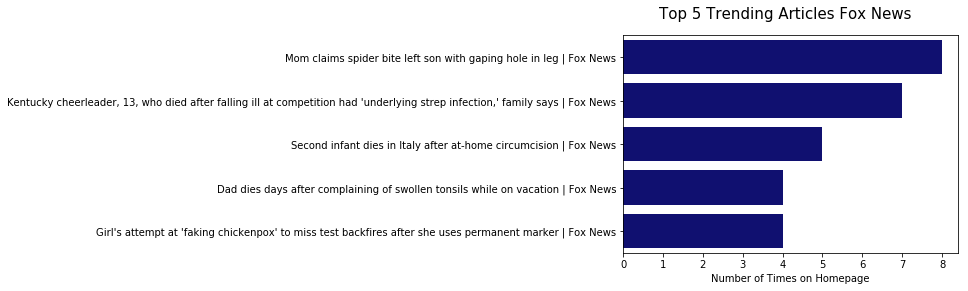

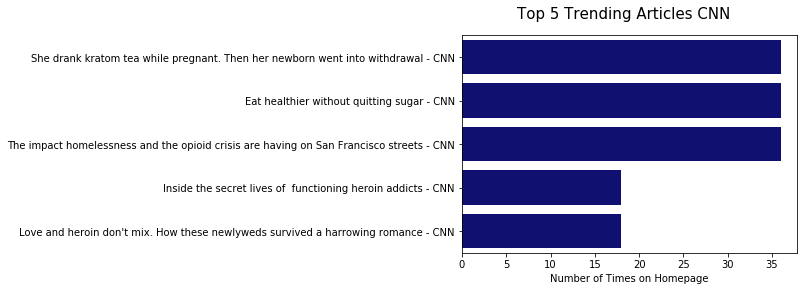

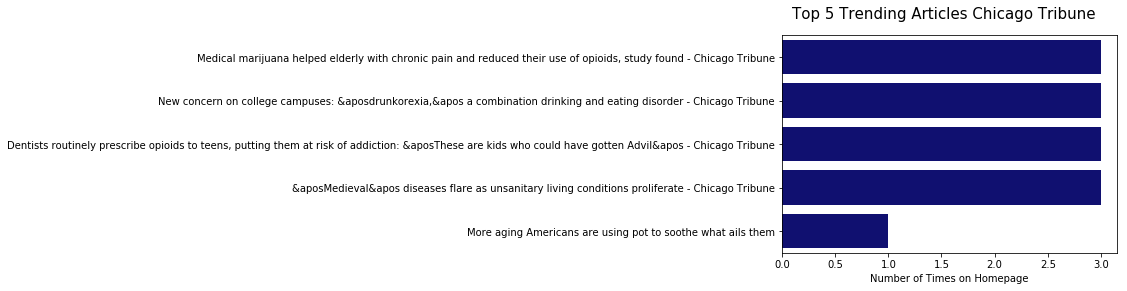

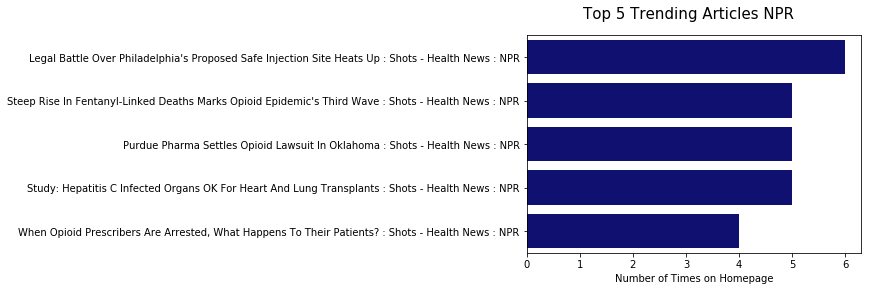

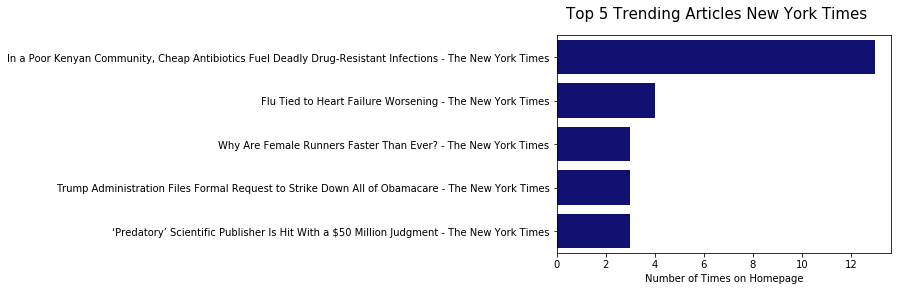

ValueError: min() arg is an empty sequence

In [574]:
#which articles were republished the most by outlet? 
#create a unique list of the website names 
outlet = list(dfAll['website_name'])
outlet = set(outlet)
for o in outlet: 
    #filter dfArticle for the outlet name 
    dfOutlet = dfAll[dfAll['website_name'] == o]
    p = sns.countplot(data=dfOutlet, y = 'title', order = dfOutlet['title'].value_counts().head(5).index, color = 'navy')
    suptitle(o)
    p.set_xlabel("Number of Times on Homepage")
    p.set_ylabel("")
    suptitle("Top 5 Trending Articles "+ o,fontsize = 15)
    plt.show()